In [1]:
import numpy as np
import scipy.io as sio

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0


Data

In [3]:
qpsk_data = sio.loadmat("./data/qpsk_data.mat")["data"]
qpsk_data.shape

(512, 1024)

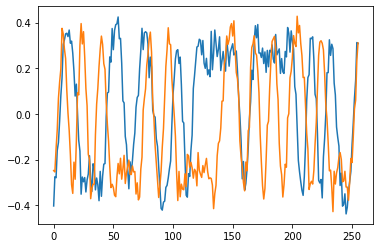

In [4]:
plt.plot(qpsk_data[0,:256].real)
plt.plot(qpsk_data[0,:256].imag)
plt.show()

In [5]:
def format_data(data_loc):
    # preallocate
    x_train = np.array([]).reshape((0,1024,2))
    y_train = np.array([])
    
    for i, name in enumerate(os.listdir(data_loc)):
        mod_data = sio.loadmat(data_loc+name)["data"]
        mod_data = np.dstack((mod_data.real, mod_data.imag))
        x_train = np.concatenate((x_train, mod_data), axis=0)
        y_train = np.concatenate((y_train, np.ones(mod_data.shape[0],)*i))
    
    x_train = np.expand_dims(x_train, axis=3)
    
    return x_train, y_train

In [6]:
x_train, y_train = format_data("./data/")

In [7]:
x_val, y_val = format_data("./val/")

Model

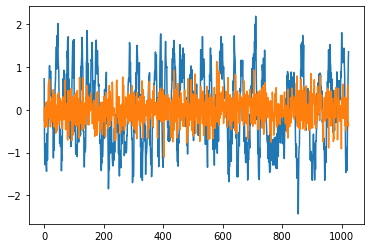

In [8]:
plt.plot(x_val[0,:,:,0])

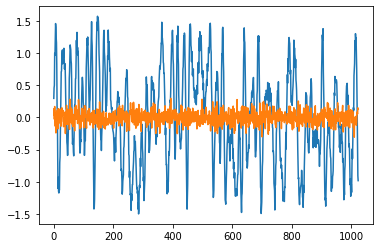

In [9]:
plt.plot(x_train[0,:,:,0])

In [10]:
x_train.shape

(2048, 1024, 2, 1)

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(8, (16,2), activation='relu', input_shape=(1024, 2, 1)),
    keras.layers.Conv2D(1, (16,1), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(4, activation='softmax'),
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val), batch_size=32)

Train on 2048 samples, validate on 512 samples
Epoch 1/5
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.8773 - accuracy: 0.5342 - val_loss: 0.5603 - val_accuracy: 0.9336
Epoch 2/5
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.2642 - accuracy: 0.9497 - val_loss: 0.1046 - val_accuracy: 0.9961
Epoch 3/5
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 4/5
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 5/5
2048/2048 [==============================] - 5s 2ms/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000


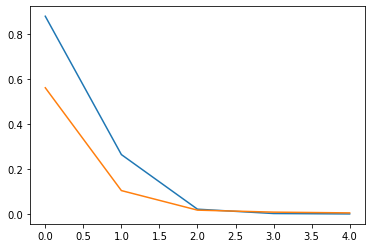

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()